**potential things that can be done:**
- adding more temperature scales
- making it immpossible to go beyond absolute zero
- looking into colour and UV
- calculating heat energy gained/lost

**what the following code does:**
- asks you to input values
- calculates the temperature coefficient
- asks what temperature scale you have worked in and the temperature scale that you want to be outputed
- >does these conversions
- asks the time you want to look at to see the temperature after in that enviorment for that specfic container
- >calculates this
- creates a graph comparing the temperature heat coefficients over 2 hours
- >could change it too be whatever time frame you want to look at, but i feel this suffices

**in essence:**
put a container in any enviorment take some measurements how it acts there then put it in any enviorment and can model how the tempertaure changes with time

In [3]:
m_water = float(input("enter the mass of the object: "))
c_p_water = float(input("enter the Specific heat capacity (J/kg·K): "))
A_cup = float(input("enter the Surface area of the cup (m²): "))
T0_water = float(input("enter the Initial temperature (°C) "))
T_water = float(input("enter the Temperature after time 't' (°C) "))
T_ambient = float(input("enter the Ambient temperature (°C) "))
time_elapsed = float(input("enter the Time elapsed (s) "))

enter the mass of the object:  0.3
enter the Specific heat capacity (J/kg·K):  6000
enter the Surface area of the cup (m²):  20
enter the Initial temperature (°C)  100
enter the Temperature after time 't' (°C)  400
enter the Ambient temperature (°C)  20
enter the Time elapsed (s)  50


In [22]:
"""
below is a useful example of some values you can input
"""
m_water = 0.3  # kg
c_p_water = 4184  # J/kg·K
A_cup = 0.03  # m²
T0_water = 80  # °C
T_water = 60  # °C
T_ambient = 25  # °C
time_elapsed = 300

In [24]:
import numpy as np

def calculate_heat_transfer_coefficient(m, c_p, A, T0, T, T_ambient, time):
    """
    Estimate heat transfer coefficient (h) using temperature data.
    
    Parameters:
    m (float): Mass of the object (kg)
    c_p (float): Specific heat capacity (J/kg·K)
    A (float): Surface area of the cup (m²)
    T0 (float): Initial temperature (°C)
    T (float): Temperature after time 't' (°C)
    T_ambient (float): Ambient temperature (°C)
    time (float): Time elapsed (s)
    
    Returns:
    float: Estimated heat transfer coefficient (W/m²K)
    """
    if T == T_ambient:
        return None  # Prevent division by zero
    ln_ratio = np.log((T - T_ambient) / (T0 - T_ambient))
    return - (m * c_p) / (A * time) * ln_ratio

h_cup = calculate_heat_transfer_coefficient(m_water, c_p_water, A_cup, T0_water, T_water, T_ambient, time_elapsed)
print(f"Estimated Heat Transfer Coefficient: {h_cup:.2f} W/m²K")

Estimated Heat Transfer Coefficient: 63.04 W/m²K


In [49]:
temp_scale = input("enter the temperature scale you would like to use (K, °F or °C): ")
change_temp_scale = input("enter the temperature scale you would like to see:" )

enter the temperature scale you would like to use (K, °F or °C):  K
enter the temperature scale you would like to see: F


In [55]:
"""
the code here is simply to add the ° symbol

I repeated it for Kelvin (even though it's not changing) so I can use 'new_change_temp_scale' throughout
"""
if change_temp_scale == "F":
    new_change_temp_scale = "°F"
if change_temp_scale == "C":
    new_change_temp_scale = "°C"
if change_temp_scale == "K":
    new_change_temp_scale = "K"

In [26]:
enviorment_temp = float(input("enter the temperature of the enviorment: "))
cooling_rate = h_cup
starting_temp = float(input("enter the starting temperature of the water: "))

enter the temperature of the enviorment:  90
enter the starting temperature of the water:  80


In [57]:
print(f"temperature scale inputing: {temp_scale}")
print(f"temperature scale outputing: {new_change_temp_scale}")

temperature scale inputing: K
temperature scale outputing: °F


In [59]:
if temp_scale == "K" :
    if change_temp_scale == "C":
        new_enviorment_temp = enviorment_temp - 273.15
        new_starting_temp = starting_temp - 273.15
    if change_temp_scale == "F":
        new_enviorment_temp = (enviorment_temp * 9/5) - 459.67
        new_starting_temp = (starting_temp * 9/5) - 459.67
if temp_scale == "C" :
    if change_temp_scale == "K":
        new_enviorment_temp = enviorment_temp + 237.15
        new_starting_temp = starting_temp + 273.15
    if change_temp_scale == "F":
        new_enviorment_temp = (enviorment_temp *9/5) + 32
        new_starting_temp = (starting_temp * 9/5) + 32
if temp_scale == "F" :
    if change_temp_scale == "C":
        new_enviorment_temp = (enviorment_temp - 32) * 5/9
        new_starting_temp = (starting_temp - 32) * 5/9
    if change_temp_scale == "K":
        new_enviorment_temp = (enviorment_temp + 459.67) * 5/9
        new_starting_temp = (starting_temp + 459.67) * 5/9

In [36]:
how_long = float(input("What time frame do you want to look at? : "))

What time frame do you want to look at? :  60


In [69]:
import math
def newtons_law_of_cooling(T0, T_ambient, k, t):
    """
    Calculates the temperature of an object at time t using Newton's Law of Cooling.
    
    Parameters:
    T0 (float): Initial temperature of the object
    T_ambient (float): Ambient temperature (surroundings)
    k (float): Cooling constant
    t (float): Time elapsed
    
    Returns:
    float: Temperature of the object at time t
    """
    return T_ambient + (T0 - T_ambient) * math.exp(-k * t)

# Example usage
initial_temp = new_starting_temp  # Initial temperature of the object (e.g., degrees Celsius)
ambient_temp = new_enviorment_temp   # Surrounding temperature (e.g., degrees Celsius)
cooling_constant = h_cup  # Cooling rate constant
time_elapsed = how_long  # Time in minutes

temp_at_t = newtons_law_of_cooling(initial_temp, ambient_temp, cooling_constant, time_elapsed)
print(f"Temperature after {time_elapsed} minutes: {temp_at_t:.2f}{new_change_temp_scale}")

Temperature after 60.0 minutes: -297.67°F


the graph below I want it to show the change for some typical containers in different enviorments 

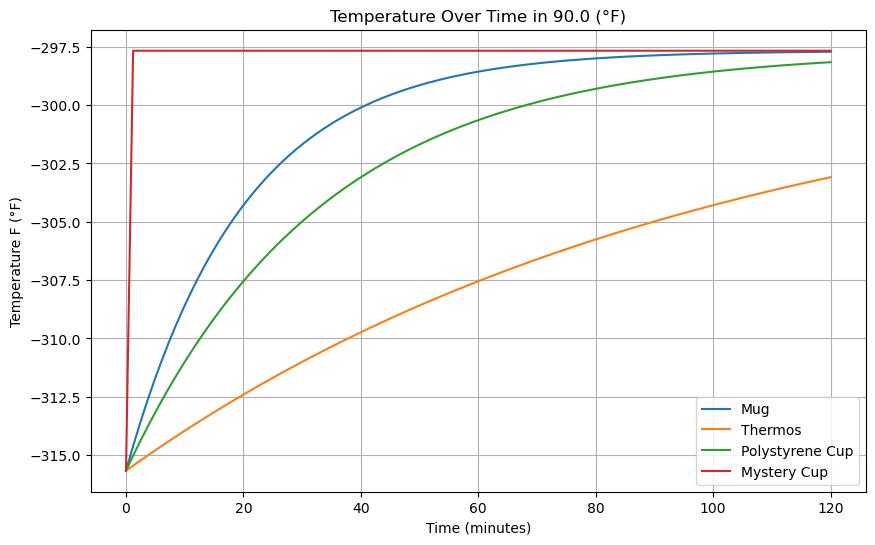

In [65]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 120, 100)  # Time in minutes (0 to 120 minutes)

# Cooling rate constants for each container
k_mug = 0.05       # Mug cooling rate
k_thermos = 0.01   # Thermos cooling rate
k_polystyrene = 0.03  # Polystyrene cup cooling rate

# Temperature model (exponential decay)
def temperature_model(initial_temp, env_temp, k, time):
    return env_temp + (initial_temp - env_temp) * np.exp(-k * time)

# Calculate temperatures for each container in room temperature environment
mug_room = temperature_model(initial_temp, ambient_temp, k_mug, time)
thermos_room = temperature_model(initial_temp, ambient_temp, k_thermos, time)
polystyrene_room = temperature_model(initial_temp, ambient_temp, k_polystyrene, time)
cup_room = temperature_model(initial_temp, ambient_temp, h_cup, time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, mug_room, label="Mug")
plt.plot(time, thermos_room, label="Thermos")
plt.plot(time, polystyrene_room, label="Polystyrene Cup")
plt.plot(time, cup_room, label="Mystery Cup")
plt.title(f"Temperature Over Time in {enviorment_temp} ({new_change_temp_scale})")
plt.xlabel("Time (minutes)")
plt.ylabel(f"Temperature {change_temp_scale} ({new_change_temp_scale})")
plt.legend()
plt.grid()
plt.show()